# **Diabetes Prediction:**



**Diabetes** is a chronic medical condition that affects millions of people worldwide. It occurs when the body cannot properly process glucose, leading to high levels of sugar in the blood. Early detection and treatment of diabetes are essential to prevent serious health complications.

The goal of this project is to build a predictive model that can accurately identify whether or not a woman is likely to develop diabetes based on her health measurements.


![](https://i0.wp.com/journomed.com/wp-content/uploads/2022/04/Scientists-studying-neural-connections-scaled-e1650436440855.jpg?resize=780%2C470&ssl=1)

**Source of Data** - National Institute of Diabetes and Digestive and
Kidney Diseases. All patients here are females at least 21 years old of Pima Indian heritage.

**Attributes:**

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

**Importing the Dependencies:**

In [58]:
import pandas as pd
import torch
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [59]:
df=pd.read_csv('diabetes.csv')

In [60]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
df.size

6912

In [62]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [63]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [64]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Splitting the Model:**

In [66]:
from sklearn.model_selection import train_test_split
X=df.drop('Outcome',axis=1).values
y=df['Outcome'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

The independent features value are needed to be converted into floats. PyTorch neural networks require input tensors to be of type torch.FloatTensor ,which is the default data type for most neural networks.

Dependent values can be int

In [67]:
import torch
import torch.nn as nn
import torch.nn.functional as F

X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [68]:
df.shape

(768, 9)

**ANN Model with Pytorch**

F.relu() function is used to apply the Rectified Linear Unit (ReLU) activation function to the output of the first two linear layers

In [69]:
class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    #Forward Propogation    
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

**torch.manual_seed()** function ensures that the random initialization of the weights in the neural network is consistent across multiple runs of the program, which can be useful for debugging and reproducibility.

model object is an instance of the ANN_Model class, 

In [70]:
torch.manual_seed(20)
model=ANN_Model()
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

**Backward Propogation**

1. To Define Loss Function
2. Define the optimizer


model.parameters() as the input, which means that it will optimize the weights of the neural network defined in model.

lr parameter sets the learning rate of the optimizer, which controls the step size taken in the direction of the gradient during optimization.

In [71]:
loss_function=nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters(), lr=0.01)

Loss will give in key value pair

After every epoch it's creates the gradient of all optimized class---> needed while back propogation

and then it finds the derivative

In [72]:
epochs=500
final_loss=[]
for i in range(epochs):
  i+=1
  y_pred=model.forward(X_train)
  loss=loss_function(y_pred, y_train)
  final_loss.append(loss)
  if i%10==1:
    print(f"Epoch No. {i} ----> loss: {loss.item()}")

  optimizer.zero_grad()
  #To find the derivative
  loss.backward() 
  optimizer.step()

Epoch No. 1 ----> loss: 3.4572105407714844
Epoch No. 11 ----> loss: 0.8019208312034607
Epoch No. 21 ----> loss: 0.6090322136878967
Epoch No. 31 ----> loss: 0.5917770266532898
Epoch No. 41 ----> loss: 0.5679708123207092
Epoch No. 51 ----> loss: 0.5529041886329651
Epoch No. 61 ----> loss: 0.5410094857215881
Epoch No. 71 ----> loss: 0.5310389995574951
Epoch No. 81 ----> loss: 0.5220361351966858
Epoch No. 91 ----> loss: 0.5135971903800964
Epoch No. 101 ----> loss: 0.5061254501342773
Epoch No. 111 ----> loss: 0.49834102392196655
Epoch No. 121 ----> loss: 0.4960551857948303
Epoch No. 131 ----> loss: 0.48286372423171997
Epoch No. 141 ----> loss: 0.4756035804748535
Epoch No. 151 ----> loss: 0.48334649205207825
Epoch No. 161 ----> loss: 0.4882740080356598
Epoch No. 171 ----> loss: 0.4693370461463928
Epoch No. 181 ----> loss: 0.46626102924346924
Epoch No. 191 ----> loss: 0.45597586035728455
Epoch No. 201 ----> loss: 0.44663771986961365
Epoch No. 211 ----> loss: 0.43963825702667236
Epoch No. 221 

**Predictions:**

torch.no_grad() works as an context manager which is used to temporarily disable gradient computation during the forward pass of the neural network.

Because we are not interested in computing gradients during inference or testing, and it can save computation time and memory.

argmax() function is called on y_pred to get the index of the class with the highest probability, which corresponds to the predicted class label. This index is converted to an integer using item().

In [73]:
 predictions=[]
 with torch.no_grad():
   for i, data in enumerate(X_test):
     y_pred=model(data)
     predictions.append(y_pred.argmax().item())
     print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
0
1
1
0
1
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
0
0
0
1
0
1
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0


In [74]:
predictions


[1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0]

**Metrics:**

In [75]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, predictions)

Text(95.72222222222221, 0.5, 'Predicted')

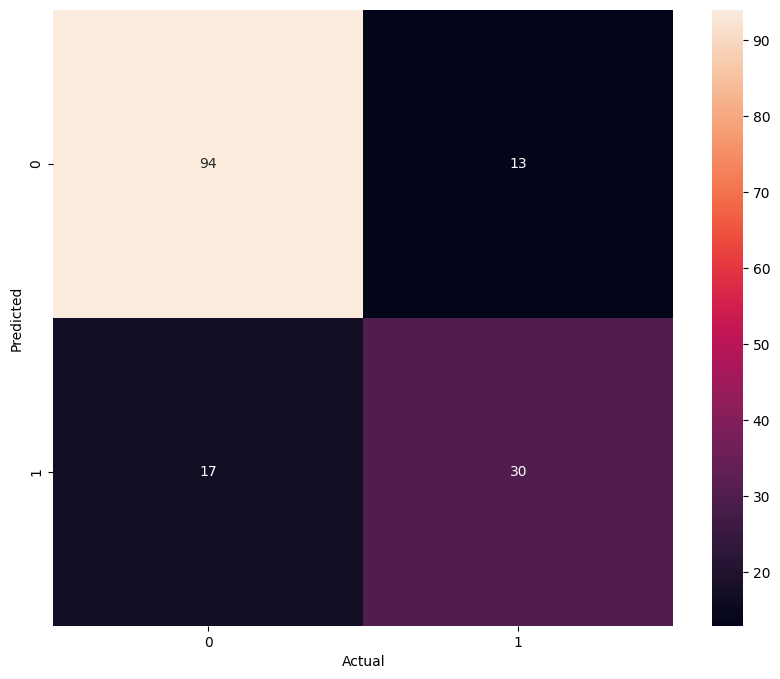

In [76]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [77]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score


accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)


print("Accuracy: ", accuracy)
print("F1 score: ", f1)
print("Recall: ", recall)
print("Precision: ", precision)

Accuracy:  0.8051948051948052
F1 score:  0.6666666666666666
Recall:  0.6382978723404256
Precision:  0.6976744186046512


In [78]:

torch.save(model, 'diabetes.pt')
model=torch.load("diabetes.pt") 

In [79]:
model.eval

<bound method Module.eval of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

**Testing:**

In [80]:
#Prediction of new data point
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [81]:
l1=[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [82]:
new_d=torch.tensor(l1)

In [83]:
with torch.no_grad():
  print(model(new_d))
  print(model(new_d).argmax().item())

tensor([0.7543, 2.6481])
1
